# Numerical Optimization Project

This project demonstrates the implementation of  numerical optimization techniques to train a linear regression model.
Three optimizers (Gradient Descent, Momentum Gradient Descent, Nesterov Accelerated Gradient) are implemented and compared.
The BFGS algorithm is also implemented for comparison.

Steps:
1. Data Generation: generated data with 3 input features and 100 observations using make_regression.
2. Model Selection: Linear regression model is chosen for the regression task.
3. Cost Function: Mean squared error (MSE) is used as the cost function.
4. First-Order Optimizers: Gradient Descent, Momentum Gradient Descent, and Nesterov Accelerated Gradient
5. Training and Visualization: The model is trained using each optimizer, and loss versus iterations is plotted.
6. Parameter Convergence: Loss versus each model parameter is plotted to visualize convergence.
7. BFGS Implementation: The BFGS algorithm is implemented and compared with first-order optimizers.
8. Performance Optimization: Different scenarios,R2 score and loss curves are compared.

In [764]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [765]:
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)

In [766]:
model = LinearRegression()

In [767]:
#cost_function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [749]:
class Optimizer:
    def __init__(self, learning_rate=0.01, momentum=0.9, max_iters=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.max_iters = max_iters
        self.tol = tol
        self.losses = []
        self.params_history = []

    def optimize(self, X, y, model, optimizer_type='gd'):
        if optimizer_type == 'gd':
            optimizer = GradientDescent(self.learning_rate, self.max_iters, self.tol)
        elif optimizer_type == 'momentum':
            optimizer = MomentumGradientDescent(self.learning_rate, self.momentum, self.max_iters, self.tol)
        elif optimizer_type == 'nesterov':
            optimizer = NesterovAcceleratedGradient(self.learning_rate, self.momentum, self.max_iters, self.tol)

        params, losses, params_history = optimizer.optimize(X, y, model)
        self.losses.append(losses)
        self.params_history.append(params_history)
        return params, losses, params_history


class GradientDescent:
    def __init__(self, learning_rate=0.01, max_iters=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.tol = tol
        self.losses = []
        self.params_history = []

    def optimize(self, X, y, model):
        params = np.random.randn(X.shape[1])
        for _ in range(self.max_iters):
            y_pred = np.dot(X, params)
            grad = np.dot(X.T, y_pred - y) / len(y)  
            params = params - self.learning_rate * grad  
            loss = mean_squared_error(y, y_pred)
            self.losses.append(loss)
            self.params_history.append(params.copy())
            if np.linalg.norm(grad) < self.tol:
                break
        return params, self.losses, self.params_history

class MomentumGradientDescent:
    def __init__(self, learning_rate=0.01, momentum=0.9, max_iters=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.max_iters = max_iters
        self.tol = tol
        self.losses = []
        self.params_history = []

    def optimize(self, X, y, model):
        params = np.random.randn(X.shape[1])  
        velocity = np.zeros_like(params)
        for _ in range(self.max_iters):
            y_pred = np.dot(X, params)
            grad = np.dot(X.T, y_pred - y) / len(y)  
            velocity = self.momentum * velocity + self.learning_rate * grad
            params = params - velocity 
            loss = mean_squared_error(y, y_pred)
            self.losses.append(loss)
            self.params_history.append(params.copy())
            if np.linalg.norm(grad) < self.tol:
                break
        return params, self.losses, self.params_history

class NesterovAcceleratedGradient:
    def __init__(self, learning_rate=0.01, momentum=0.9, max_iters=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.max_iters = max_iters
        self.tol = tol
        self.losses = []
        self.params_history = []

    def optimize(self, X, y, model):
        params = np.random.randn(X.shape[1])  
        velocity = np.zeros_like(params)
        for _ in range(self.max_iters):
            params_next = params + self.momentum * velocity 
            y_pred = np.dot(X, params_next)
            grad = np.dot(X.T, y_pred - y) / len(y)  
            velocity = self.momentum * velocity + self.learning_rate * grad  
            params = params - velocity
            loss = mean_squared_error(y, y_pred)
            self.losses.append(loss)
            self.params_history.append(params.copy())
            if np.linalg.norm(grad) < self.tol:
                break
        return params, self.losses, self.params_history

In [750]:
optimizer = Optimizer(learning_rate=0.01, momentum=0.9, max_iters=1000, tol=1e-6)
gd_params, gd_losses, gd_params_history = optimizer.optimize(X, y, model, optimizer_type='gd')
momentum_params, momentum_losses, momentum_params_history = optimizer.optimize(X, y, model, optimizer_type='momentum')
nesterov_params, nesterov_losses, nesterov_params_history = optimizer.optimize(X, y, model, optimizer_type='nesterov')

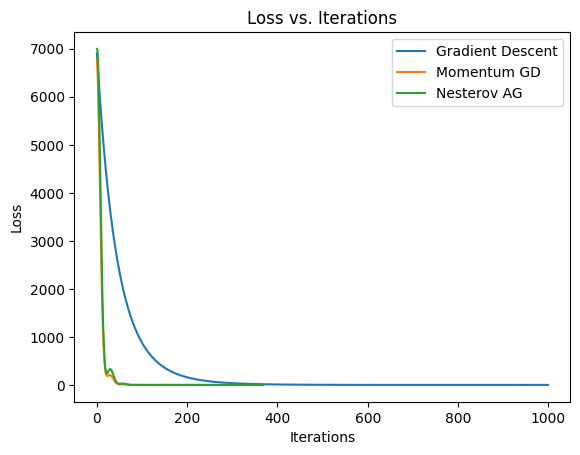

In [751]:
plt.plot(gd_losses, label='Gradient Descent')
plt.plot(momentum_losses, label='Momentum GD')
plt.plot(nesterov_losses, label='Nesterov AG')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.legend()

In [752]:
type(gd_params_history)

list

In [753]:
gd_params_history

[array([ 0.43474175,  0.89033443, -0.61604849]),
 array([ 0.53763039,  1.74823806, -0.56020459]),
 array([ 0.64073068,  2.59576221, -0.5035891 ]),
 array([ 0.74403094,  3.43303607, -0.44622478]),
 array([ 0.84751966,  4.26018723, -0.38813395]),
 array([ 0.95118557,  5.07734163, -0.32933856]),
 array([ 1.05501757,  5.88462363, -0.26986015]),
 array([ 1.15900476,  6.68215602, -0.20971988]),
 array([ 1.26313641,  7.47006002, -0.1489385 ]),
 array([ 1.36740201,  8.24845533, -0.08753642]),
 array([ 1.47179121,  9.01746011, -0.02553366]),
 array([1.57629384, 9.77719107, 0.03705012]),
 array([ 1.68089992, 10.52776339,  0.10019563]),
 array([ 1.78559963, 11.26929083,  0.16388391]),
 array([ 1.89038335, 12.0018857 ,  0.22809637]),
 array([ 1.9952416 , 12.72565888,  0.29281476]),
 array([ 2.10016508, 13.44071987,  0.35802116]),
 array([ 2.20514468, 14.14717675,  0.42369798]),
 array([ 2.31017141, 14.84513627,  0.48982796]),
 array([ 2.41523647, 15.5347038 ,  0.55639418]),
 array([ 2.52033121, 16

In [754]:
# convert  to numpy arrays
gd_params_history = np.array(gd_params_history)
momentum_params_history = np.array(momentum_params_history)
nesterov_params_history = np.array(nesterov_params_history)

In [755]:
type(gd_params_history)

numpy.ndarray

Plot losses vs. each model parameter

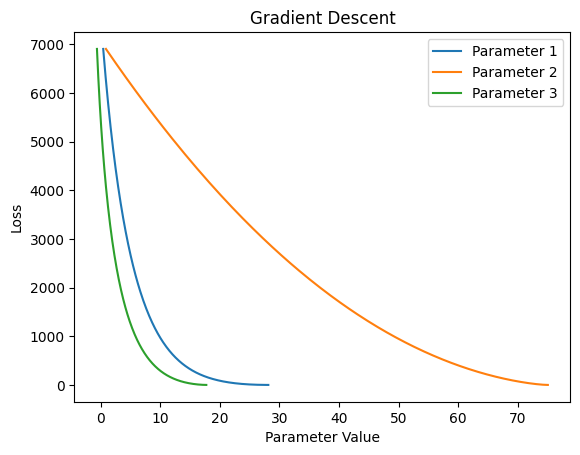

In [756]:
for i, param in enumerate(gd_params_history.T):
    plt.plot(param, gd_losses, label=f'Parameter {i+1}')
plt.xlabel('Parameter Value')
plt.ylabel('Loss')
plt.title('Gradient Descent')
plt.legend()

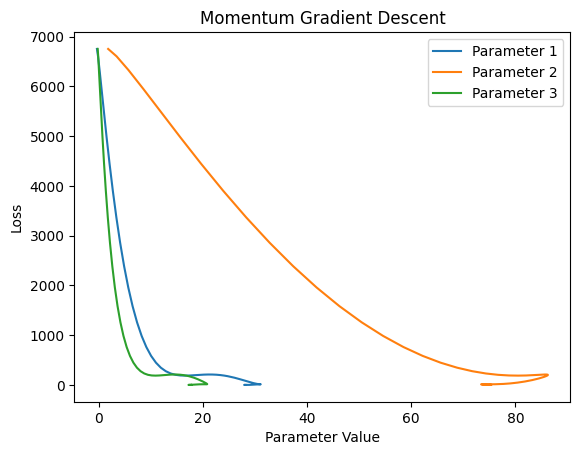

In [757]:
for i, param in enumerate(momentum_params_history.T): 
    plt.plot(param, momentum_losses, label=f'Parameter {i+1}')
plt.xlabel('Parameter Value')
plt.ylabel('Loss')
plt.title('Momentum Gradient Descent')
plt.legend()

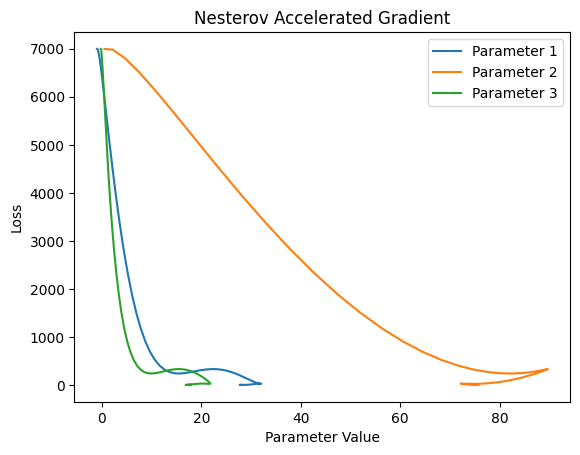

In [758]:
for i, param in enumerate(nesterov_params_history.T):
    plt.plot(param, nesterov_losses, label=f'Parameter {i+1}')
plt.xlabel('Parameter Value')
plt.ylabel('Loss')
plt.title('Nesterov Accelerated Gradient')
plt.legend()

# Experiment with different scenarios

In [463]:
gd_params, gd_losses, gd_params_history = optimizer.optimize(X, y, model, optimizer_type='gd')

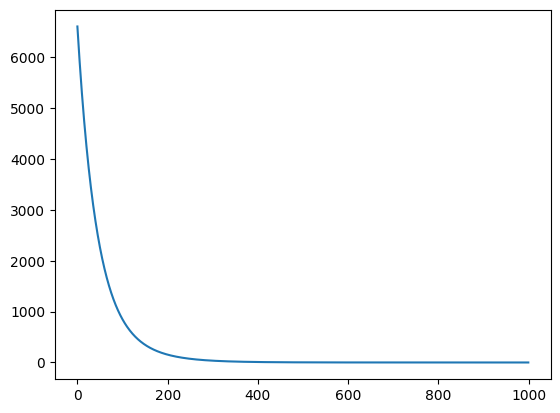

In [464]:
plt.plot(gd_losses, label='Gradient Descent')

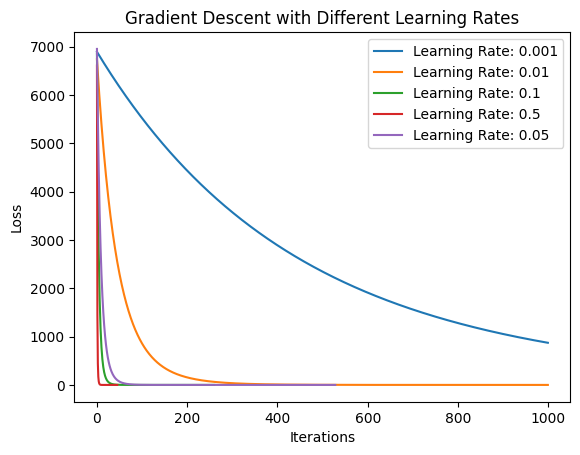

In [639]:
learning_rates = [0.001, 0.01, 0.1, 0.5, 0.05]
for lr in learning_rates:
    optimizer = Optimizer(learning_rate=lr, max_iters=1000, tol=1e-6)
    gd_params, gd_losses, gd_params_history = optimizer.optimize(X, y, model, optimizer_type='gd')
    plt.plot(gd_losses, label=f'Learning Rate: {lr}')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Gradient Descent with Different Learning Rates')
plt.legend()

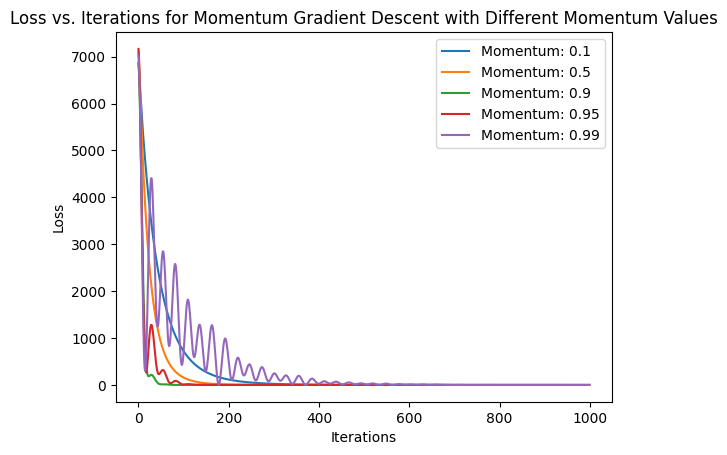

In [466]:
momentum_values = [0.1, 0.5, 0.9, 0.95, 0.99]
for momentum in momentum_values:
    optimizer = Optimizer(learning_rate=0.01, momentum=momentum, max_iters=1000, tol=1e-6)
    momentum_params, momentum_losses, momentum_params_history = optimizer.optimize(X, y, model, optimizer_type='momentum')
    plt.plot(momentum_losses, label=f'Momentum: {momentum}')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for Momentum Gradient Descent with Different Momentum Values')
plt.legend()
plt.show()

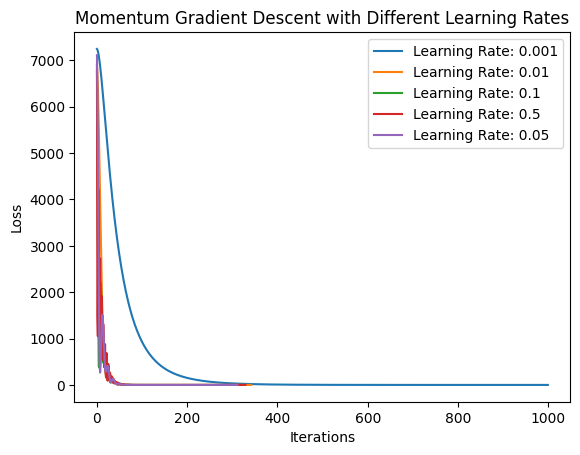

In [467]:
learning_rates = [0.001, 0.01, 0.1, 0.5, 0.05]
for lr in learning_rates:
    optimizer = Optimizer(learning_rate=lr, momentum=0.9, max_iters=1000, tol=1e-6)
    momentum_params, momentum_losses, momentum_params_history = optimizer.optimize(X, y, model, optimizer_type='momentum')
    plt.plot(momentum_losses, label=f'Learning Rate: {lr}')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Momentum Gradient Descent with Different Learning Rates')
plt.legend()
plt.show()

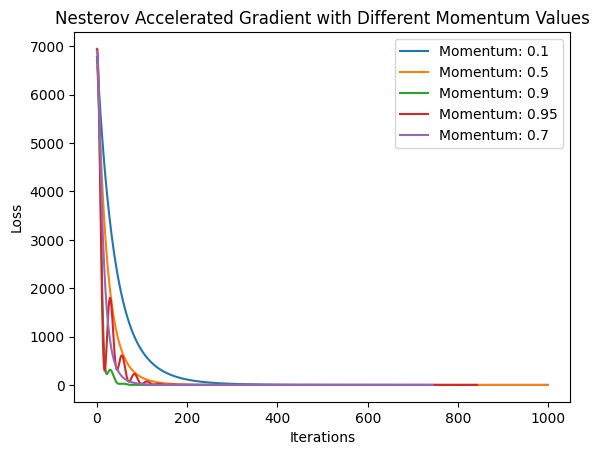

In [468]:
momentum_values = [0.1, 0.5, 0.9, 0.95, 0.7]
for momentum in momentum_values:
    optimizer = Optimizer(learning_rate=0.01, momentum=momentum, max_iters=1000, tol=1e-6)
    nesterov_params, nesterov_losses, nesterov_params_history = optimizer.optimize(X, y, model, optimizer_type='nesterov')
    plt.plot(nesterov_losses, label=f'Momentum: {momentum}')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Nesterov Accelerated Gradient with Different Momentum Values')
plt.legend()
plt.show()

Compare final loss values

In [469]:
# compare final loss values
print("Final Loss Values:")
print("Batch GD Loss:", gd_losses[-1])
print("Momentum GD Loss:", momentum_losses[-1])
print("Nesterov AG Loss:", nesterov_losses[-1])

Final Loss Values:
Batch GD Loss: 0.01003120630669473
Momentum GD Loss: 0.010031206305974307
Nesterov AG Loss: 0.01003120630673011


Stochastic and Mini Batch gradient descent

In [470]:
class StochasticGradientDescent:
    def __init__(self, learning_rate=0.01, max_iters=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.tol = tol
        self.losses = []
        self.params_history = []

    def optimize(self, X, y, model):
        params = np.random.randn(X.shape[1]) 
        n_samples = X.shape[0]
        for _ in range(self.max_iters):
            rand_index = np.random.randint(n_samples)  
            X_sample, y_sample = X[rand_index], y[rand_index]
            y_pred = np.dot(X_sample, params)
            grad = np.dot(X_sample.T, y_pred - y_sample)  
            params -= self.learning_rate * grad  
            loss = mean_squared_error(y_sample, y_pred)
            self.losses.append(loss)
            self.params_history.append(params.copy())
            if np.linalg.norm(grad) < self.tol:
                break
        return params, self.losses, self.params_history

In [612]:
class MiniBatchGradientDescent:
    def __init__(self, learning_rate=0.005, batch_size=32, epochs=10,max_iters=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.tol = tol
        self.losses = []
        self.params_history = []
        self.max_iters = max_iters

    def optimize(self, X, y, model):
        params = np.random.randn(X.shape[1])  
        n_samples = X.shape[0]
        for epoch in range(self.epochs):
            for _ in range(self.max_iters):
                rand_indices = np.random.choice(n_samples, self.batch_size, replace=False)  
                X_batch, y_batch = X[rand_indices], y[rand_indices]
                y_pred = np.dot(X_batch, params)
                grad = np.dot(X_batch.T, y_pred - y_batch) / self.batch_size  
                params -= self.learning_rate * grad  
                loss = mean_squared_error(y_batch, y_pred)
                self.losses.append(loss)
                self.params_history.append(params.copy())
                if np.linalg.norm(grad) < self.tol:
                    break
        return params, self.losses, self.params_history

In [649]:
sgd_optimizer = StochasticGradientDescent()
mini_batch_optimizer = MiniBatchGradientDescent()
sgd_params, sgd_losses, _ = sgd_optimizer.optimize(X, y, model)
mini_batch_params, mini_batch_losses, _ = mini_batch_optimizer.optimize(X, y, model)

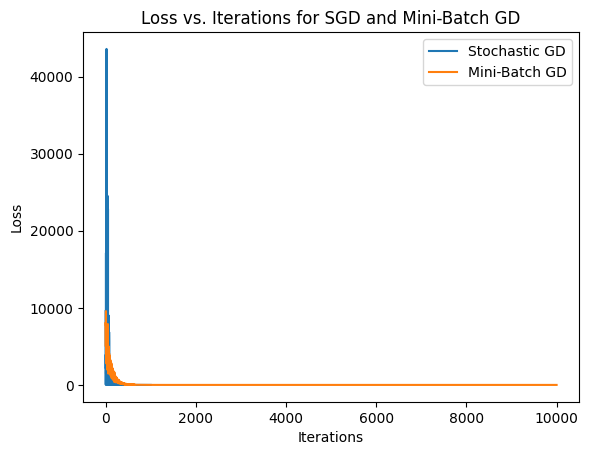

In [650]:
plt.plot(sgd_losses, label='Stochastic GD')
plt.plot(mini_batch_losses, label='Mini-Batch GD')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for SGD and Mini-Batch GD')
plt.legend()
plt.show()

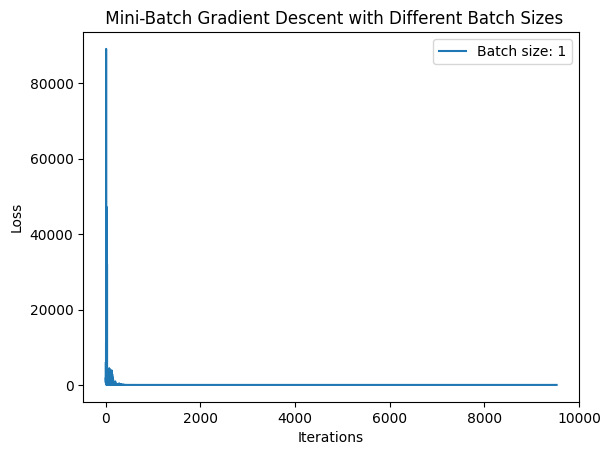

In [605]:
batch_size = 1
label = f'Batch size: {batch_size}'
mini_batch_optimizer = MiniBatchGradientDescent(learning_rate=0.01, batch_size=batch_size, tol=1e-6)
_, losses, _ = mini_batch_optimizer.optimize(X, y, model)
plt.plot(losses, label=label)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(' Mini-Batch Gradient Descent with Different Batch Sizes')
plt.legend()
plt.show()

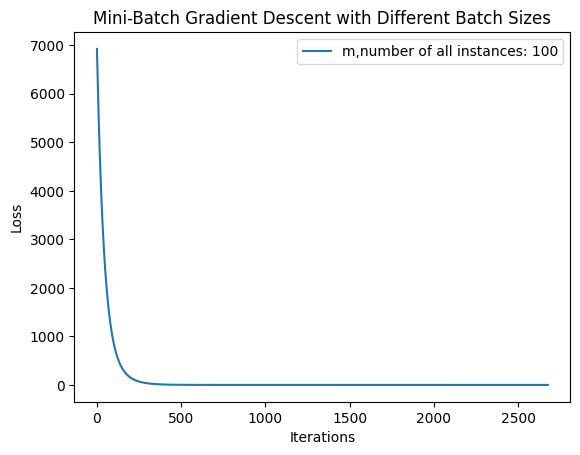

In [606]:
batch_size = X.shape[0]
label = f'm,number of all instances: {batch_size}'
mini_batch_optimizer = MiniBatchGradientDescent(batch_size=batch_size, tol=1e-6)
_, losses, _ = mini_batch_optimizer.optimize(X, y, model)
plt.plot(losses, label=label)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Mini-Batch Gradient Descent with Different Batch Sizes')
plt.legend()
plt.show()

In [687]:
class StochasticGradientDescentWithMomentum:
    def __init__(self, learning_rate=0.01, momentum=0.9, max_iters=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.max_iters = max_iters
        self.tol = tol
        self.losses = []
        self.params_history = []
    def optimize(self, X, y, model):
        params = np.random.randn(X.shape[1])
        velocity = np.zeros_like(params)
        n_samples = X.shape[0]
        for _ in range(self.max_iters):
            rand_index = np.random.randint(n_samples)
            X_sample, y_sample = X[rand_index], y[rand_index]
            y_pred = np.dot(X_sample, params)
            grad = np.dot(X_sample.T, y_pred - y_sample)
            velocity = self.momentum * velocity + self.learning_rate * grad 
            params -= velocity
            loss = mean_squared_error(y_sample, y_pred)
            self.losses.append(loss)
            self.params_history.append(params.copy())
            if np.linalg.norm(grad) < self.tol:
                break
        return params, self.losses, self.params_history

In [688]:
sgdm_optimizer = StochasticGradientDescentWithMomentum()
sgdm_params, sgdm_losses, _ = sgdm_optimizer.optimize(X, y, model)

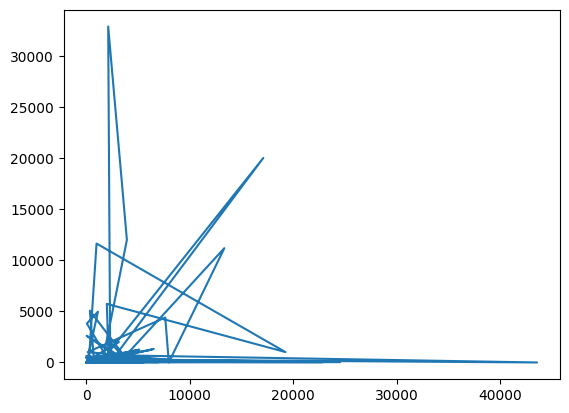

In [689]:
plt.plot(sgd_losses,sgdm_losses, label='Stochastic with momentum')

In [607]:
optimizer_scenario_1 = MiniBatchGradientDescent()
params_scenario_1, losses_scenario_1, _ = optimizer_scenario_1.optimize(X, y, model)

optimizer_scenario_2 = MiniBatchGradientDescent(learning_rate=0.1)
params_scenario_2, losses_scenario_2, _ = optimizer_scenario_2.optimize(X, y, model)

optimizer_scenario_3 = MiniBatchGradientDescent(batch_size=16)
params_scenario_3, losses_scenario_3, _ = optimizer_scenario_3.optimize(X, y, model)

optimizer_scenario_4 = MiniBatchGradientDescent(batch_size=64)
params_scenario_4, losses_scenario_4, _ = optimizer_scenario_4.optimize(X, y, model)

optimizer_scenario_5 = MiniBatchGradientDescent(learning_rate=0.001)
params_scenario_5, losses_scenario_5, _ = optimizer_scenario_5.optimize(X, y, model)

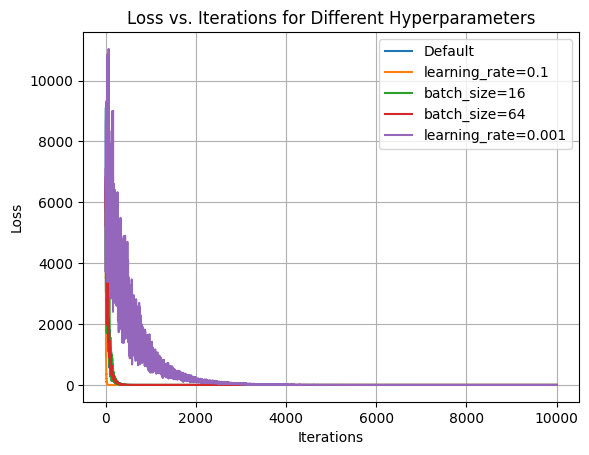

In [608]:
plt.plot(losses_scenario_1, label='Default')
plt.plot(losses_scenario_2, label='learning_rate=0.1')
plt.plot(losses_scenario_3, label='batch_size=16')
plt.plot(losses_scenario_4, label='batch_size=64')
plt.plot(losses_scenario_5, label='learning_rate=0.001')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for Different Hyperparameters')
plt.legend()
plt.grid(True)
plt.show()

In [478]:
#BFGS and comparing

In [663]:
class BFGS:
    def optimize(self, X, y, model):
        def loss(params):
            y_pred = np.dot(X, params)
            return mean_squared_error(y, y_pred)     
        params = np.random.randn(X.shape[1]) 
        result = minimize(loss, params, method='BFGS')
        return result.x, [result.fun], [result.x]

bfgs_optimizer = BFGS()
bfgs_params, bfgs_losses, _ = bfgs_optimizer.optimize(X, y, model)

print("BFGS Loss:", bfgs_losses[-1])
print("Gradient Descent Loss:", gd_losses[-1])

BFGS Loss: 0.010031206305216932
Gradient Descent Loss: 0.013827488259470286


In [743]:
class BFGS:
    def __init__(self, tol=1e-6, max_iters=1000):
        self.tol = tol
        self.max_iters = max_iters

    def optimize(self, X, y):
        def loss(params):
            y_pred = np.dot(X, params)
            return np.mean((y_pred - y) ** 2)   
        n_params = X.shape[1]
        params = np.random.randn(n_params) 
        H_inv = np.eye(n_params)
        losses = []
        for _ in range(self.max_iters):
            grad = self.compute_gradient(loss, params) 
            params_new = self.update_params(params, grad, H_inv) 
            loss_val = loss(params_new)
            losses.append(loss_val)
            if np.linalg.norm(grad) < self.tol:
                break           
            params = params_new  # Update parameters for the next iteration       
        return params, losses

    def compute_gradient(self, loss_func, params, eps=1e-6):
        grad = np.zeros_like(params)
        for i in range(len(params)):
            params_plus = params.copy()
            params_plus[i] += eps
            params_minus = params.copy()
            params_minus[i] -= eps
            grad[i] = (loss_func(params_plus) - loss_func(params_minus)) / (2 * eps)
        return grad

    def update_params(self, params, grad, H_inv):
        scaling_factor= 1 / np.dot(grad, params)
        I = np.eye(len(params))
        H_inv_new = (I - scaling_factor * np.outer(params, grad)) @ H_inv @ (I - scaling_factor * np.outer(grad, params)) + scaling_factor * np.outer(params, params)
        d = -np.dot(H_inv_new, grad)
        return params + d

In [744]:
# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# normalize target
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()
bfgs_optimizer = BFGS()
bfgs_params, bfgs_losses = bfgs_optimizer.optimize(X_scaled, y_scaled)
print("BFGS Loss:", bfgs_losses[-1])

BFGS Loss: 0.1608963718175561


In [723]:
# bfgs_optimizer = BFGS()
# bfgs_params, bfgs_losses, _ = bfgs_optimizer.optimize(X, y, model)
# print("BFGS Loss:", bfgs_losses[-1])
# print("Gradient Descent Loss:", gd_losses[-1])

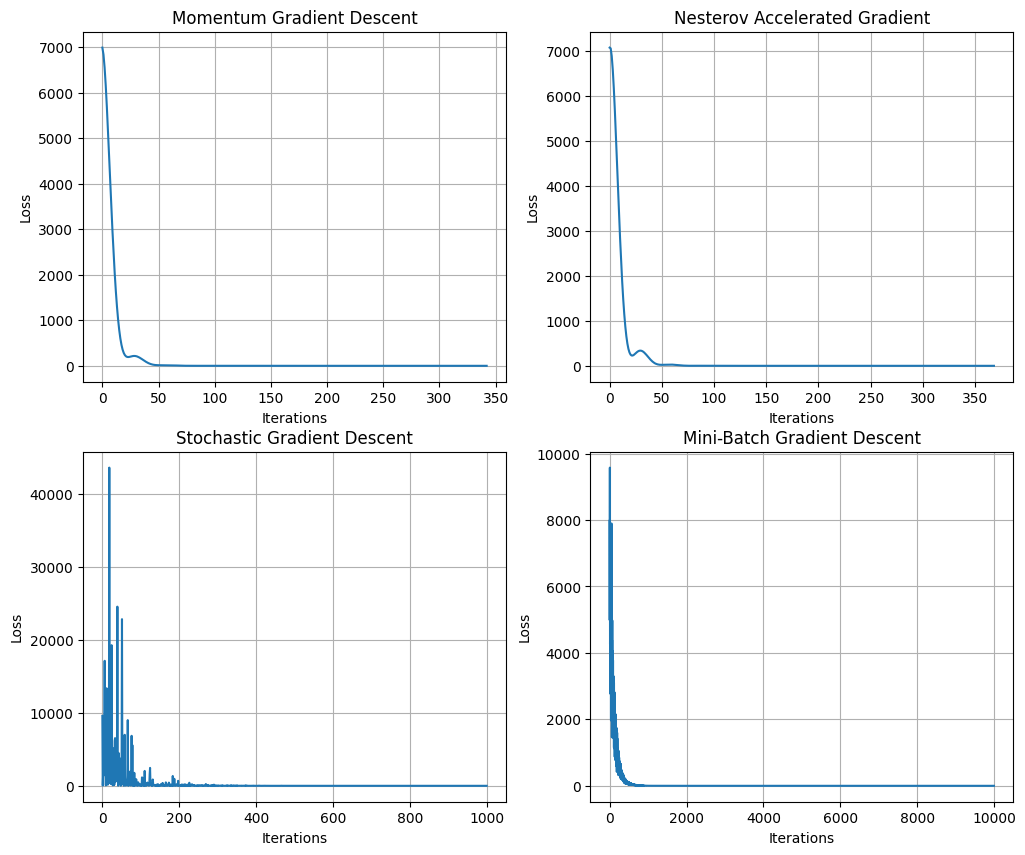

In [726]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].plot(momentum_losses, label='Momentum GD')
axs[0, 0].set_title('Momentum Gradient Descent')
axs[0, 0].set_xlabel('Iterations')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].grid(True)

axs[0, 1].plot(nesterov_losses, label='Nesterov AG')
axs[0, 1].set_title('Nesterov Accelerated Gradient')
axs[0, 1].set_xlabel('Iterations')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].grid(True)

axs[1, 0].plot(sgd_losses, label='SGD')
axs[1, 0].set_title('Stochastic Gradient Descent')
axs[1, 0].set_xlabel('Iterations')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].grid(True)

axs[1, 1].plot(mini_batch_losses, label='Mini-Batch GD')
axs[1, 1].set_title('Mini-Batch Gradient Descent')
axs[1, 1].set_xlabel('Iterations')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].grid(True)

In [434]:
#model evaluation with R2

In [761]:
X_test, y_test = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)
def evaluate_model_r2(X_test, y_test, params):
    y_pred = np.dot(X_test, params)
    r2 = r2_score(y_test, y_pred)
    return r2

In [762]:
r2_batch_gd = evaluate_model_r2(X_test, y_test, gd_params)
r2_momentum_gd = evaluate_model_r2(X_test, y_test, momentum_params)
r2_nesterov_ag = evaluate_model_r2(X_test, y_test, nesterov_params)
r2_sgd = evaluate_model_r2(X_test, y_test, sgd_params)

In [763]:
print("R-squared on Test Data:")
print("Batch Gradient Descent:", r2_batch_gd)
print("Momentum Gradient Descent:", r2_momentum_gd)
print("Nesterov Accelerated Gradient:", r2_nesterov_ag)
print("Stochastic Gradient Descent:", r2_sgd)

R-squared on Test Data:
Batch Gradient Descent: 0.9999979988097577
Momentum Gradient Descent: 0.9999985424880622
Nesterov Accelerated Gradient: 0.9999985424880622
Stochastic Gradient Descent: 0.9999981853079057


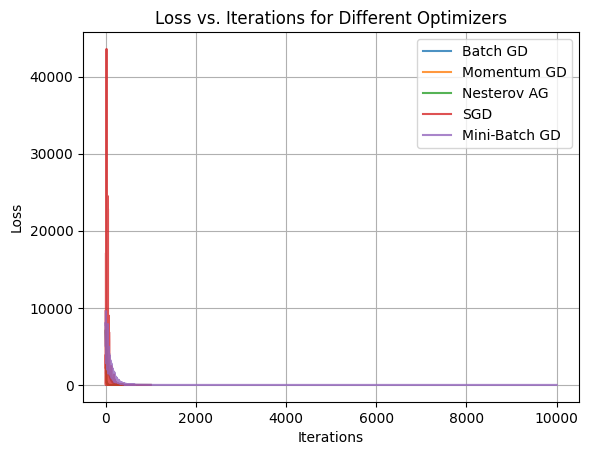

In [727]:
plt.plot(gd_losses, label='Batch GD', alpha=0.8) 
plt.plot(momentum_losses, label='Momentum GD', alpha=0.8)
plt.plot(nesterov_losses, label='Nesterov AG', alpha=0.8)
plt.plot(sgd_losses, label='SGD', alpha=0.8)
plt.plot(mini_batch_losses, label='Mini-Batch GD', alpha=0.8)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for Different Optimizers')
plt.legend()
plt.grid(True)
plt.show()

In [728]:
print("Final Model Parameters and Loss:")
print("Batch GD:")
print("Final Parameters:", gd_params)
print("Final Loss:", gd_losses[-1])
print("-------------------------")
print("Momentum GD:")
print("Final Parameters:", momentum_params)
print("Final Loss:", momentum_losses[-1])
print("-------------------------")
print("Nesterov AG:")
print("Final Parameters:", nesterov_params)
print("Final Loss:", nesterov_losses[-1])
print("-------------------------")
print("SGD:")
print("Final Parameters:", sgd_params)
print("Final Loss:", sgd_losses[-1])
print("-------------------------")
print("Mini-Batch GD:")
print("Final Parameters:", mini_batch_params)
print("Final Loss:", mini_batch_losses[-1])

Final Model Parameters and Loss:
Batch GD:
Final Parameters: [28.13519029 75.03314251 17.73097146]
Final Loss: 0.013827488259470286
-------------------------
Momentum GD:
Final Parameters: [28.20619718 75.05141277 17.75235507]
Final Loss: 0.010031206306018989
-------------------------
Nesterov AG:
Final Parameters: [28.20619712 75.05141201 17.75235395]
Final Loss: 0.010031206305975829
-------------------------
SGD:
Final Parameters: [28.1497726  75.05823175 17.73759874]
Final Loss: 0.0008745405304817432
-------------------------
Mini-Batch GD:
Final Parameters: [28.20715991 75.05149858 17.75171419]
Final Loss: 0.009107127257896717


In [731]:
# mse on test data
def evaluate_model(X_test, y_test, params):
    y_pred = np.dot(X_test, params)
    mse = mean_squared_error(y_test, y_pred)
    return mse

mse_batch_gd = evaluate_model(X_test, y_test, gd_params)
mse_momentum_gd = evaluate_model(X_test, y_test, momentum_params)
mse_nesterov_ag = evaluate_model(X_test, y_test, nesterov_params)
mse_sgd = evaluate_model(X_test, y_test, sgd_params)
mse_mini_batch_gd = evaluate_model(X_test, y_test, mini_batch_params)

In [732]:
print("Mean Squared Error (MSE) on Test Data:")
print("Batch Gradient Descent:", mse_batch_gd)
print("Momentum Gradient Descent:", mse_momentum_gd)
print("Nesterov Accelerated Gradient:", mse_nesterov_ag)
print("Stochastic Gradient Descent:", mse_sgd)
print("Mini-Batch Gradient Descent:", mse_mini_batch_gd)

Mean Squared Error (MSE) on Test Data:
Batch Gradient Descent: 0.013778851562237475
Momentum Gradient Descent: 0.010031206305848845
Nesterov Accelerated Gradient: 0.010031206305729038
Stochastic Gradient Descent: 0.012489469421755477
Mini-Batch Gradient Descent: 0.010032318864630607


# Concluding Remarks
Based on the MSE values and R2 obtained , it appears that Nesterov Accelerated Gradient the best optmization performance among first order optimzers

Experiment with different scenarios

In [ ]:
learning_rates = [0.01, 0.1, 0.5]
scenarios_losses = []

for lr in learning_rates:
    optimizer = GradientDescent(learning_rate=lr)
    _, losses, _ = optimizer.optimize(X, y, model)
    scenarios_losses.append(losses)

# Plot losses for different scenarios
plt.figure(figsize=(8, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(scenarios_losses[i], label=f'LR={lr}')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for Different Learning Rates')
plt.legend()
plt.show()